In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetXLS.xlsx
/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv


In [13]:
!pip install simple_colors
!pip install langdetect
!pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=3547173a454b7545471059fceac9fca45ce61a34b7df2573cf467d87f1809d9b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from simple_colors import *
import random
from langdetect import detect
import re
from googletrans import Translator
from sklearn.metrics import pairwise_distances
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df_main = pd.read_csv("/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv", index_col=0)
print(blue(f"\n Size of the dataset: {df_main.shape} \n", 'bold'))

df_main.head()


 Size of the dataset: (6871, 14) 



,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
Srno,,,,,,,,,,,,,,
1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [16]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6871 entries, 1 to 14211
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RecipeName              6871 non-null   object
 1   TranslatedRecipeName    6871 non-null   object
 2   Ingredients             6865 non-null   object
 3   TranslatedIngredients   6865 non-null   object
 4   PrepTimeInMins          6871 non-null   int64 
 5   CookTimeInMins          6871 non-null   int64 
 6   TotalTimeInMins         6871 non-null   int64 
 7   Servings                6871 non-null   int64 
 8   Cuisine                 6871 non-null   object
 9   Course                  6871 non-null   object
 10  Diet                    6871 non-null   object
 11  Instructions            6871 non-null   object
 12  TranslatedInstructions  6871 non-null   object
 13  URL                     6871 non-null   object
dtypes: int64(4), object(10)
memory usage: 805.2+ KB


In [17]:
df_main['TranslatedIngredients'] = df_main['TranslatedIngredients'].astype('str')
df_main['TranslatedInstructions'] = df_main['TranslatedInstructions'].astype('str')

In [18]:
# Detecting the Different Languages available in the Translated Version of the different Columns

print("Different Languages in Recipe Name Column: ", df_main['TranslatedRecipeName'].apply(lambda text: detect(text)).unique())
print("Different Languages in Ingradients Column: ", df_main['TranslatedIngredients'].apply(lambda text: detect(text)).unique())
print("Different Languages in Recipe Instruction Column: ", df_main['TranslatedInstructions'].apply(lambda text: detect(text)).unique())

Different Languages in Recipe Name Column:  ['id' 'en' 'it' 'nl' 'ro' 'es' 'pt' 'fr' 'de' 'ca' 'tl' 'af' 'hr' 'sq'
 'lv' 'pl' 'sw' 'da' 'et' 'tr' 'so' 'sl' 'fi' 'no' 'sv' 'cs']
Different Languages in Ingradients Column:  ['en' 'ro' 'sv' 'tl' 'hi' 'mr' 'ne' 'id' 'fr' 'ca' 'pt' 'no' 'nl' 'et'
 'lt']
Different Languages in Recipe Instruction Column:  ['en' 'hi']


In [19]:
translator = Translator()

def translation(text):
    language = translator.detect(text)
    if language == 'en':
        return (text)
    else:
        translated_text = translator.translate(text, dest='en')
        return (translated_text.text)
    

df_main['NewTranslatedRecipeName'] = df_main['TranslatedRecipeName'].apply(lambda x: translation(x))
df_main['NewTranslatedIngredients'] = df_main['TranslatedIngredients'].apply(lambda x: translation(x))
df_main['NewTranslatedInstructions'] = df_main['TranslatedInstructions'].apply(lambda x: translation(x))

print("All the Columns have been Translated to English!")
df_main.drop(["TranslatedRecipeName", "TranslatedIngredients", "TranslatedInstructions"], axis=1, inplace=True)

All the Columns have been Translated to English!


In [20]:
# Dropping the null rows and extra columns

df_main.dropna(axis='index', how='any', inplace=True)
df = df_main.drop(['RecipeName', 'Ingredients', 'Instructions', 'URL'], axis='columns')
df.head()

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,NewTranslatedRecipeName,NewTranslatedIngredients,NewTranslatedInstructions
Srno,,,,,,,,,,
1,15,30,45,6,Indian,Side Dish,Diabetic Friendly,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","To begin making the Masala Karela Recipe,de-se..."
2,5,10,15,3,South Indian Recipes,Main Course,Vegetarian,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato..."
3,20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,Ragi Semi's Upama Recipe - Ragi Millet Wormisi...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","To begin making the Ragi Vermicelli Recipe, fi..."
4,15,30,45,4,Andhra,Lunch,Non Vegeterian,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...
5,10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,Andhra Style Aalam Paadhe Recipe - Ginger Chut...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ..."


In [21]:
# Detecting the Different Languages available in the Translated Version of the different Columns

print("Different Languages in Recipe Name Column: ", df['NewTranslatedRecipeName'].apply(lambda text: detect(text)).unique())
print("Different Languages in Ingradients Column: ", df['NewTranslatedIngredients'].apply(lambda text: detect(text)).unique())
print("Different Languages in Recipe Instruction Column: ", df['NewTranslatedInstructions'].apply(lambda text: detect(text)).unique())

Different Languages in Recipe Name Column:  ['id' 'en' 'nl' 'it' 'es' 'pt' 'no' 'de' 'ro' 'fr' 'tl' 'ca' 'hr' 'sq'
 'af' 'sl' 'pl' 'sw' 'da' 'et' 'so' 'lv' 'fi' 'tr' 'lt' 'cy' 'cs']
Different Languages in Ingradients Column:  ['en' 'ro' 'sv' 'nl' 'fr' 'ca' 'pt' 'no' 'et' 'tl' 'lt']
Different Languages in Recipe Instruction Column:  ['en']


In [22]:
df.describe().style.background_gradient(cmap='cividis')

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
count,6865.000000,6865.000000,6865.000000,6865.000000
mean,28.591260,30.833795,59.425055,5.613256
std,81.076862,34.030198,88.736882,26.233181
min,0.000000,0.000000,0.000000,1.000000
25%,10.000000,20.000000,30.000000,4.000000
50%,15.000000,30.000000,40.000000,4.000000
75%,20.000000,35.000000,55.000000,4.000000
max,2880.000000,900.000000,2925.000000,1000.000000


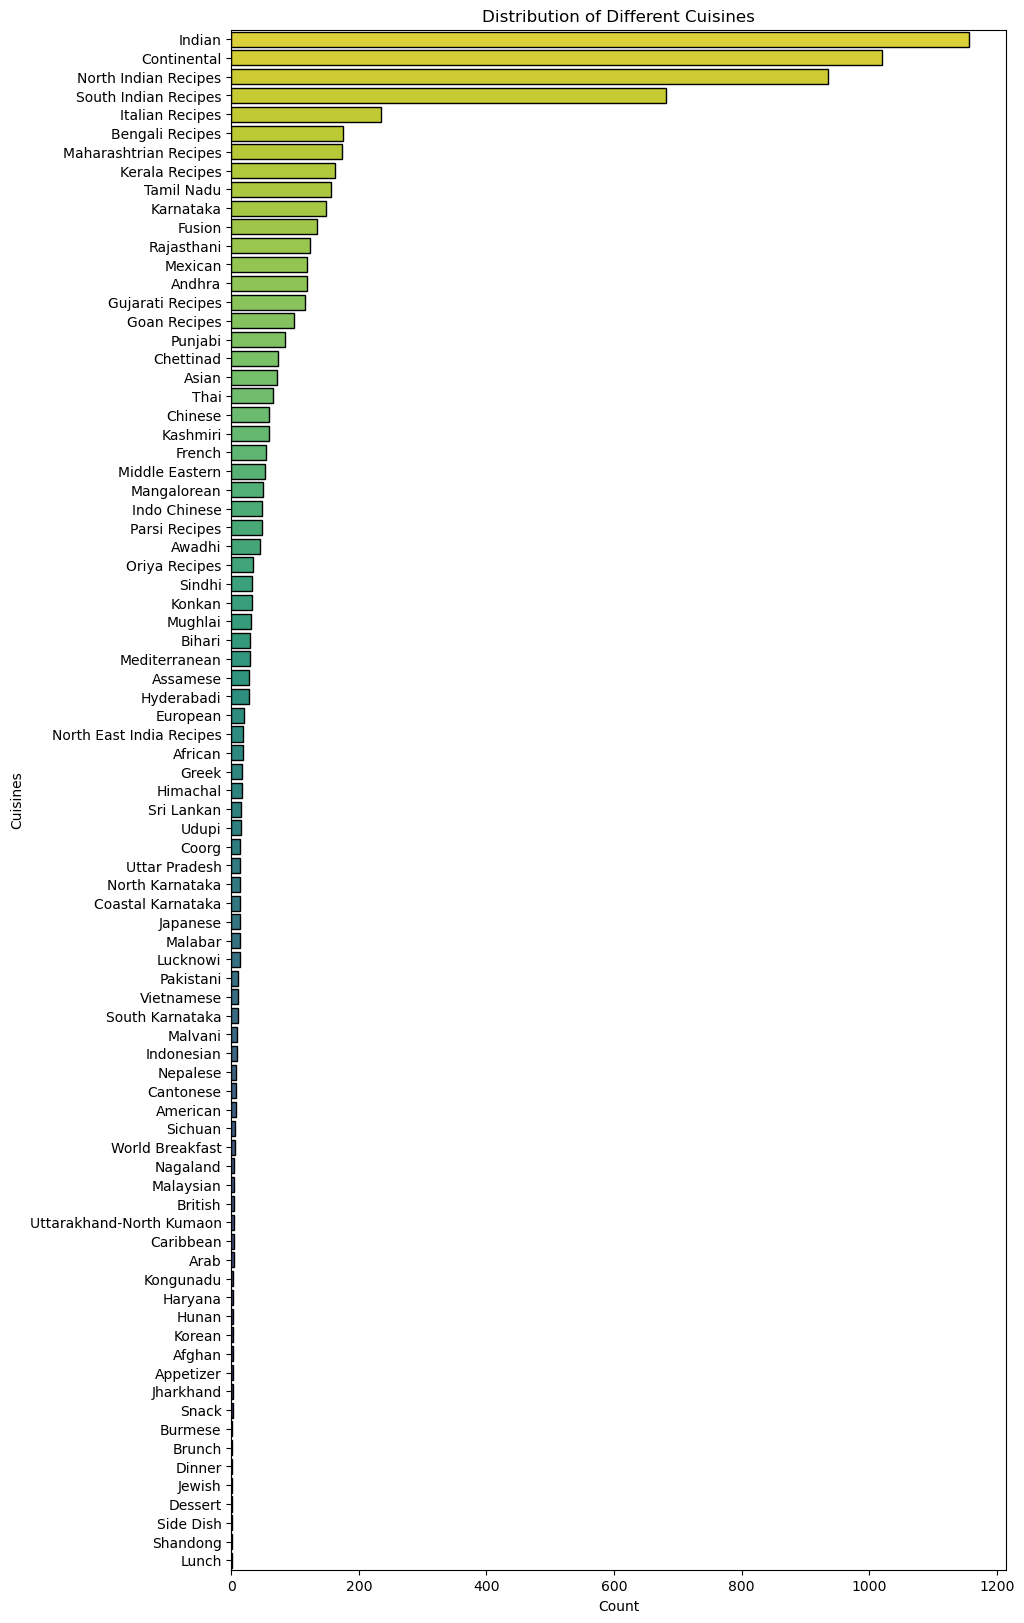

In [23]:
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='Cuisine', order=df['Cuisine'].value_counts().index, palette='viridis_r', edgecolor='black');
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.title('Distribution of Different Cuisines')
plt.show()

In [24]:
pies = ['Course', 'Diet']
for i in pies:
    fig = go.Figure(data=[go.Pie(labels=df[i].explode().unique(), values=df[i].explode().value_counts())])
    fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), title_text=i)
    fig.show()

True     6708
False     157
Name: TotalTimeInMins, dtype: int64


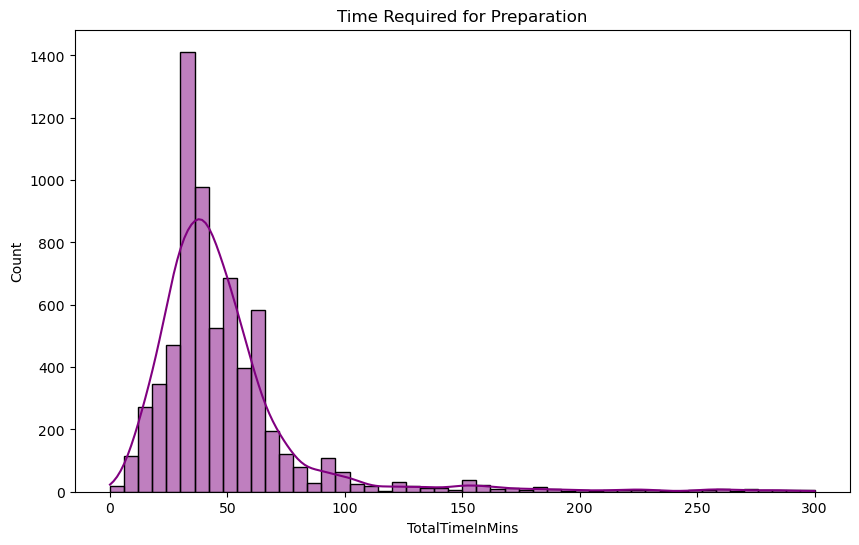

In [25]:
plt.figure(figsize=(10, 6))
mask = df['TotalTimeInMins'] <= 300
print(mask.value_counts())
sns.histplot(data=df[mask]['TotalTimeInMins'], bins=50, kde=True, color='purple');
plt.title('Time Required for Preparation')
plt.show()

#### This graph shows that maximum part of our database requires Preparation time less than 5 hours!

## Setting up a Baseline Model

In [26]:
df["combined"] = df["NewTranslatedRecipeName"] + " " + df["NewTranslatedIngredients"] + " " + df["Cuisine"] + " " + df["Course"] + " " + df["Diet"] + " " + df["NewTranslatedInstructions"]

vectorizer = TfidfVectorizer(max_features=8000)
vectors = vectorizer.fit_transform(df['combined']).toarray()
vectors = pd.DataFrame(vectors)

df = df.reset_index(drop=True)
vectors = vectors.reset_index(drop=True)

df_new = pd.concat([df, vectors], axis=1)
df_new.drop(["combined", "NewTranslatedRecipeName", "NewTranslatedIngredients", "Cuisine", "Course", "Diet", "NewTranslatedInstructions"], axis=1, inplace=True)
print(df_new.shape)
df_new.info()

(6865, 8004)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Columns: 8004 entries, PrepTimeInMins to 7999
dtypes: float64(8000), int64(4)
memory usage: 419.2 MB


<function matplotlib.pyplot.show(close=None, block=None)>

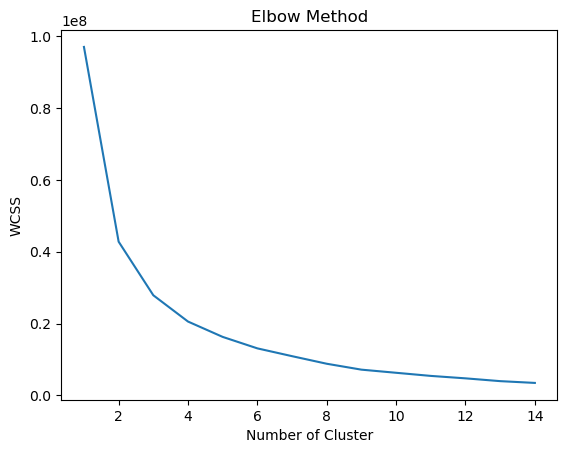

In [27]:
df_new.columns = df_new.columns.astype("str")
X_train, X_test = train_test_split(df_new, test_size=0.2, random_state=42)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X_train)

In [31]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(pca_df, x='principal component 1', y='principal component 2', z='principal component 3', opacity=0.5, color="Cluster")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [30]:
def get_user_input():
    ingredients = input("Please enter the ingredients you have (separated by commas): ")
    allergies = input("Please enter any ingredients you are allergic to (separated by commas): ")
    cuisine_pref = input("Please enter your cuisine preference: ")
    prep_time = int(input("Please enter your maximum preparation time in minutes: "))
    return ingredients, allergies, cuisine_pref, prep_time

In [33]:
def recommend_recipes():
    ingredients, allergies, cuisine_pref, max_prep_time = get_user_input()

    # Vectorization of the ingredients and allergies
    ingredients_vector = vectorizer.transform([ingredients])
    allergies_vector = vectorizer.transform([allergies])

    # Estimatation of PrepTimeInMins and CookTimeInMins
    estimated_prep_time = max_prep_time // 2
    estimated_cook_time = max_prep_time - estimated_prep_time

    default_servings = 1

    additional_features = np.array([estimated_prep_time, estimated_cook_time, max_prep_time, default_servings]).reshape(1, -1)
    user_vector = np.hstack((ingredients_vector.toarray(), additional_features))

    if user_vector.shape[1] != X_train.shape[1]:
        raise ValueError("The input vector does not have the same number of features as the training data.")

    user_cluster = kmeans.predict(user_vector)
    cluster_indices = np.where(kmeans.labels_ == user_cluster)[0]

    cluster_indices = [i for i in cluster_indices if (df.iloc[i]['Cuisine'] == cuisine_pref and df.iloc[i]['TotalTimeInMins'] <= max_prep_time and df.iloc[i]['Servings'] >= default_servings)]

    if not cluster_indices:
        print("No recipes found that match your preferences.")
        return
    
    # Calculation of the distance from the user's input to each recipe in the same cluster
    distances = pairwise_distances(user_vector, X_train.iloc[cluster_indices])

    sorted_indices = np.argsort(distances)[0]
    top_20_indices = sorted_indices[:20]
    closest_indices = [cluster_indices[i] for i in top_20_indices]

    # Removal of recipes that contain allergenic ingredients
    recommended_recipes = df.iloc[closest_indices]
    allergy_list = allergies.split(',')
    for i, row in recommended_recipes.iterrows():
        ingredients = row['NewTranslatedIngredients']
        if any(re.search(r'\b' + re.escape(allergy.strip()) + r'\b', ingredients, re.IGNORECASE) for allergy in allergy_list):
            recommended_recipes = recommended_recipes.drop(i)

    count = 0
    for index, row in recommended_recipes.iterrows():
        if count < 5:
            print(green(f"\n Recipe Name: {row['NewTranslatedRecipeName']} \n", "bold"))
            print(red(f"Ingredients: {row['NewTranslatedIngredients']} \n", "bold"))
            print(f"Recipe: {row['NewTranslatedInstructions']}")
            print("\n" + "-" * 30 + "\n")
            count += 1
        else:
            break

recommend_recipes()


# Input:
#     Please enter the ingredients you have (separated by commas):  Rice Vermicilli Noodles
#     Please enter any ingredients you are allergic to (separated by commas):  Sweet corn
#     Please enter your cuisine preference:  Chinese
#     Please enter your maximum preparation time in minutes:  60


Please enter the ingredients you have (separated by commas):  Rice Vermicilli Noodles
Please enter any ingredients you are allergic to (separated by commas):  Sweet corn
Please enter your cuisine preference:  Chinese
Please enter your maximum preparation time in minutes:  60



 Recipe Name: Chicken Schezwan Momo - Steamed Chicken Dumpling Recipe 

Ingredients: 100 grams Chicken - minced,1 Carrot (Gajjar) - finely minced,1/2 Onion - finely minced,1 Green Bell Pepper (Capsicum) - finely minced,1 inch Ginger - finely minced,4 cloves Garlic - finely minced,2 tablespoons Schezwan sauce,1/2 teaspoon Black pepper powder,Salt - to taste,6 Stalk Spring Onion Greens - finely minced,1 cup All Purpose Flour (Maida),Salt - to taste 

Recipe: To begin making the Chicken Schezwan Momo Recipe, first let’s make the dough first.To make the Momo doughIn a mixing bowl, add maida, salt and add water slowly and knead to form a medium stiff dough. The dough should not be smooth and non sticky.Keep the momo dough covered for 2 hours before making Chicken Schezwan stuffing.For the Chicken Schezwan StuffingHeat a pan with some oil, add ginger and garlic that finely chopped and saute till they soften.Add onions, and saute till they turn translucent. Add in chopped carrot and bell pep